# AYUSH SWAMY
# GRIP
# The Sparks Foundation
## Task : Prediction using Supervised ML
### Aim : Predict the percentage of an student based on the no. of study hours.

## Importing the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## Importing data

In [2]:
url=r"http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Exploration

In [6]:
#shape of the data
data.shape

(25, 2)

In [7]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#Checking for null values in the train dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

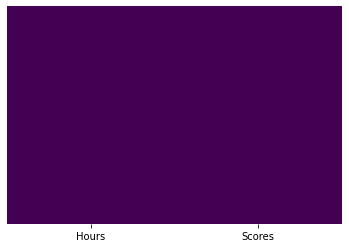

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis');

Since there are no missing values in the dataset so we don't have to further impute any data.

In [18]:
plt.style.use('ggplot')

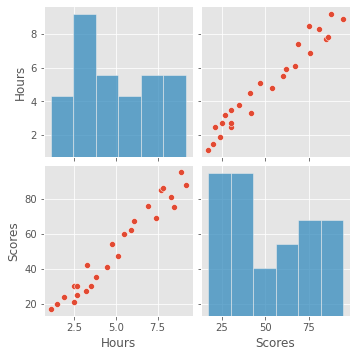

In [20]:
sns.pairplot(data);

this is the exploratory data analysis between hours and scores


## Data Visualization

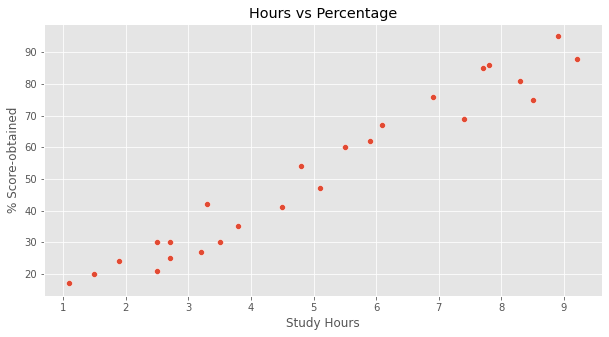

In [21]:
# Plotting the distribution of scores
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Hours', y = 'Scores', palette = 'rainbow');  
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('% Score-obtained')  
plt.show()

This graph reveals that "positive linear relation" of % Score-obtained and Study Hours



Now we'll prepare the data. In the next step, we will divide the data into attributes and lables

## Splitting the data set

In [22]:
#Split data into attributes and labels
#Splitting data into training sets and testing sets
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=5, random_state=0)

## Training the model


In [26]:
regression_data = LinearRegression()  
regression_data.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

## Plotting regression line

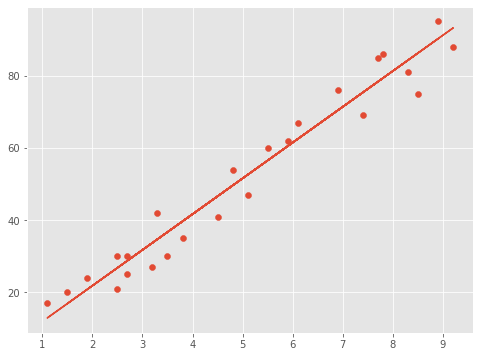

In [31]:
# Plotting the regression line
line = regression_data.coef_*x+regression_data.intercept_
# Plotting for the test data
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Predictions

In [33]:
# Model Prediction 
y_pred = regression_data.predict(x_test)

In [34]:
# Comparing actual and predicted values
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [35]:
#Training and Testing score
print("Training Score:",regression_data.score(x_train,y_train))
print("Testing Score:",regression_data.score(x_test,y_test))

Training Score: 0.9515510725211552
Testing Score: 0.9454906892105356


<AxesSubplot:>

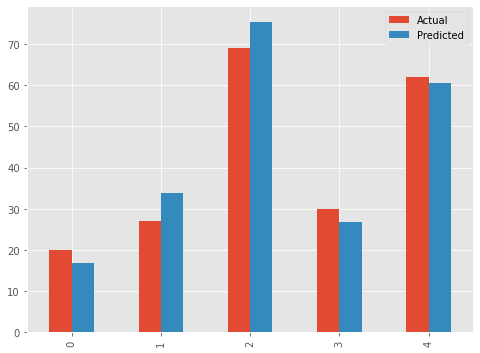

In [40]:
df.plot(kind = "bar" , figsize = (8,6))

In [36]:
#now we predict the score if a student studies for 9.25 hrs/ day?
print('predicted score : {}'.format(regression_data.predict(np.array([9.25]).reshape(-1,1))))

predicted score : [93.69173249]


## Evaluate the model

In [37]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('R-2:',r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
R-2: 0.9454906892105356


This is the prediction of a student that study for 9.25 hours in a day : 93.69173249 With a R-2 score of : 0.9454906892105356